## Generated new data set with systematics

In [1]:
from LHEImport.LHEImport import LHEImport as LHEI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["science", "grid"])
plt.rcParams.update({"font.family":"serif", "font.size":16, "figure.figsize":[20,10]})

In [2]:
## uncomment this cell to generate the hdf5 files.
# data = LHEI('event_files/lhe/ttZ_events_lhapdf_02.lhe')
# data.toHDF5('event_files/hdf5/ttZ_events_02', 'particles_limited', limit_events=True)
# data.toHDF5('event_files/hdf5/ttZ_events_02', 'particles', limit_events=False)

In [3]:
# # generating a big list of all data, can then be imported into a pd.DataFrame
# datalist = []
# for i in range(0, len(Data['eventdata'])):
#     event_particles = Data['eventdata'][i]['final_particles']
#     for particle in event_particles:
#         datalist.append(particle.__dict__)

In [4]:
# df = pd.DataFrame(datalist)

In [5]:
df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'particles_limited')
df
# df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'limit_particles')

,barcode,pdgid,status,pt,eta,phi,px,py,pz,energy,mass,pdgid_string,pdgid_latex,parent1,parent2,event_count,spin
0,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,467.440451,467.440451,0.000,g,g,0,0,0,1.0
1,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-387.099943,387.099943,0.000,g,g,0,0,0,-1.0
2,3,6,1,190.901288,-0.818419,0.383857,-177.008824,71.492501,-174.272357,311.035619,173.000,t,t,1,2,0,-1.0
3,4,-6,1,158.863901,1.482395,-0.724676,118.943678,-105.309736,331.738449,406.469110,173.000,t~,\overline{t},1,2,0,1.0
4,5,23,1,67.194989,-0.982114,0.527379,58.065146,33.817234,-77.125584,137.035665,91.188,Z,Z^{0},1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,510.009603,510.009603,0.000,g,g,0,0,97,-1.0
486,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-344.149702,344.149702,0.000,g,g,0,0,97,1.0
487,3,6,1,167.362347,-0.697016,1.402144,28.092458,164.987785,-126.332114,271.843628,173.000,t,t,1,2,97,1.0
488,4,-6,1,123.135651,0.753204,1.079018,-58.143896,108.543429,101.767794,235.474144,173.000,t~,\overline{t},1,2,97,-1.0


## Using scikit-hep/vector testing

In [6]:
import vector

## Plot of $p_t$, $\phi$, $\eta$ and Energy for each particle.

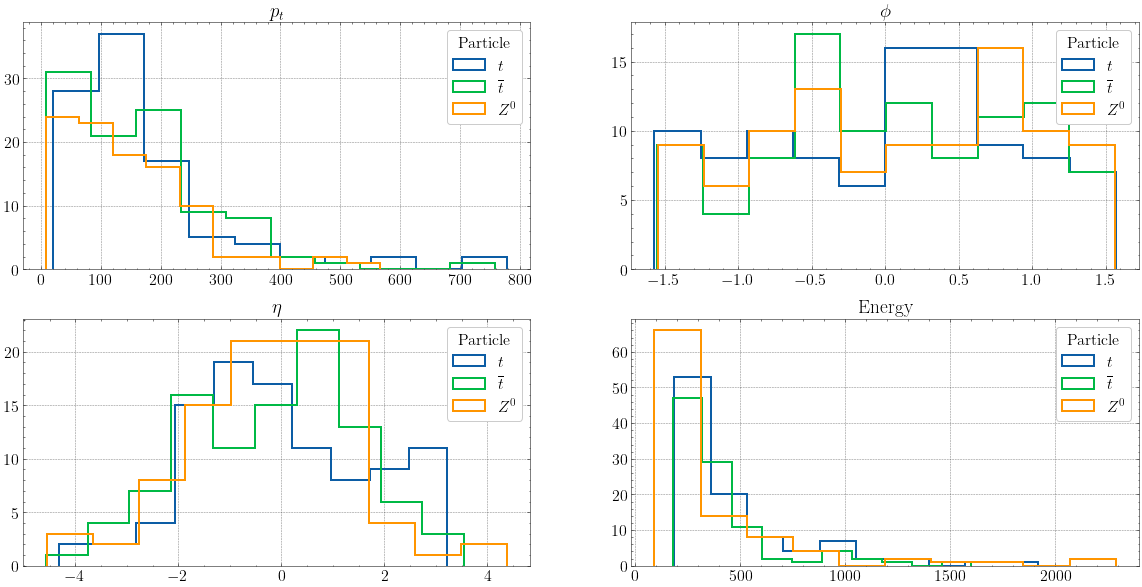

In [7]:
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "phi", "eta", "energy"], axes.flatten()):
    for num in [6,-6,23]:
        particle_string = df[df['pdgid']==num].iloc[0].pdgid_latex
        ax.hist(df[df['pdgid']==num][param], histtype='step', label=f"${particle_string}$", linewidth=2)
        ax.legend(title="Particle", loc="upper right")
        if param == 'energy':
            ax.title.set_text("Energy")
        elif param == 'pt':
            ax.title.set_text("$p_t$")
        else:
            ax.title.set_text(f'$\\{param}$')
plt.show()

## Additional plots
Require plots of: 
- $p_t$ of the total system
- $\delta \phi$ between the tops

Have to do calculations that depend on events. 

Firstly need a way to put the data into a dataframe. 

For p_t one way to idenfity would be to sum p_t for all particles where parent != 0. Parent = 0 implies intial state particle. 

For delta phi, extract the four vecs for particles where abs(pdgid)==6

In [8]:
##doing this to keep the following operations from messing everything up

df2 = df

/tmp/ipykernel_60803/2315373443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2['event_count']==i)]['deltaphi'] = 12


,barcode,pdgid,status,pt,eta,phi,px,py,pz,energy,mass,pdgid_string,pdgid_latex,parent1,parent2,event_count,spin,deltaphi
0,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,467.440451,467.440451,0.000,g,g,0,0,0,1.0,0.0
1,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-387.099943,387.099943,0.000,g,g,0,0,0,-1.0,0.0
2,3,6,1,190.901288,-0.818419,0.383857,-177.008824,71.492501,-174.272357,311.035619,173.000,t,t,1,2,0,-1.0,0.0
3,4,-6,1,158.863901,1.482395,-0.724676,118.943678,-105.309736,331.738449,406.469110,173.000,t~,\overline{t},1,2,0,1.0,0.0
4,5,23,1,67.194989,-0.982114,0.527379,58.065146,33.817234,-77.125584,137.035665,91.188,Z,Z^{0},1,2,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,510.009603,510.009603,0.000,g,g,0,0,97,-1.0,0.0
486,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-344.149702,344.149702,0.000,g,g,0,0,97,1.0,0.0
487,3,6,1,167.362347,-0.697016,1.402144,28.092458,164.987785,-126.332114,271.843628,173.000,t,t,1,2,97,1.0,0.0
488,4,-6,1,123.135651,0.753204,1.079018,-58.143896,108.543429,101.767794,235.474144,173.000,t~,\overline{t},1,2,97,-1.0,0.0


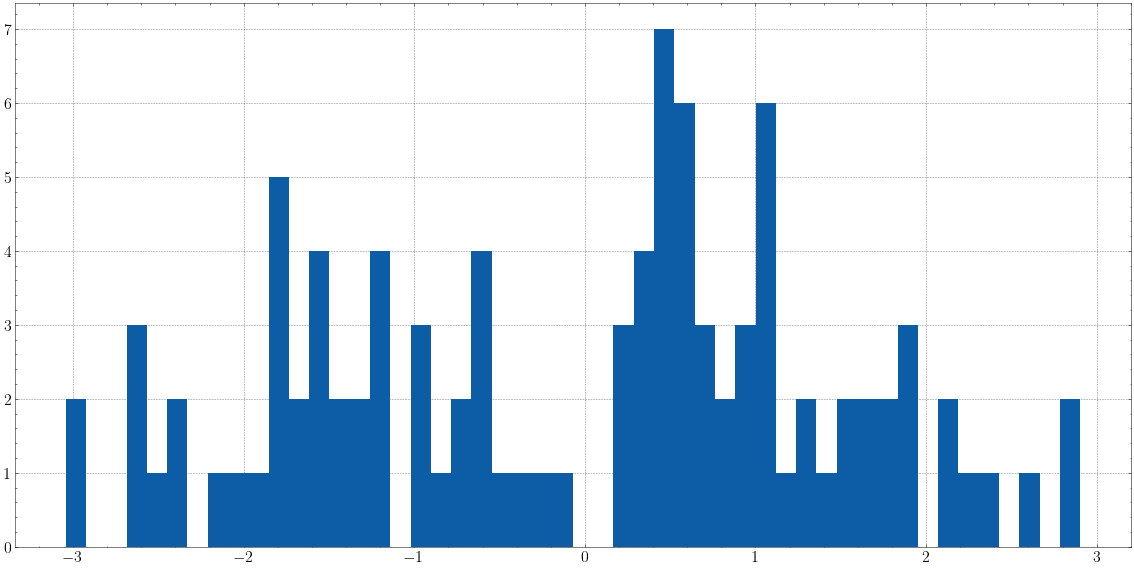

In [12]:
delta_phi=[]
for name, group in df2.groupby('event_count'):
    t_vecs=[]
    for row_index, row in group.iterrows():
        if abs(row.pdgid)==6:
            t_vecs.append(vector.obj(pt=row['pt'], phi=row['phi'], eta=row['eta'], E=row['energy']))
    delta_phi.append(t_vecs[0].deltaphi(t_vecs[1]))
for i in range(0, len(delta_phi)+1):
    df2.loc[(df2['event_count']==i)]['deltaphi'] = 12
    
plt.hist(delta_phi, bins=50)
df2